<a href="https://colab.research.google.com/github/Rafi653/Data-Mining/blob/feature%2Fscratch/Data_Mining_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

Through this homework, you'll practice the basics of data cleaning, data partition, data normalization, and data visualization.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are totally welcomed.

## Part 1: Data cleaning and pre-processing

### Problem 1 ##

Glass Identification Data

Source: https://archive.ics.uci.edu/ml/datasets/glass+identification

Creator: B. German 

    Central Research Establishment 

    Home Office Forensic Science Service 

    Aldermaston, Reading, Berkshire RG7 4PN 

Donor: Vina Spiehler, Ph.D., DABFT 

    Diagnostic Products Corporation 

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df_m = pd.read_excel("Glass_Identification_Data.xlsx") 
df_m.head()

df = df_m

**TODO1:**
*   Count the the **percentage** of null/missing values for each variable
*   Drop the variables which have more than 75% missing values *(Avoid manual intervention. Code should work even if the attribute/data changes)*

In [ ]:
"""
Calculate percentage of missing values in each column
"""

missing_df = (df.isnull() | df.isna()).sum() * 100 / len(df)

print(missing_df)

"""
Drop column if it has more than 75 percent of missing values.
"""
for k, v in missing_df.items():
  if v > 75:
    print(f"Column `{k}` has more than 75 percent of missing values. So we drop it.")
    df = df.drop(k, axis=1)
  
df.head()


ID        0.000000
RI        0.934579
Na        0.934579
Mg        7.943925
Al        0.000000
Si        0.467290
K         2.336449
CA        0.000000
Ba       78.037383
Fe        0.000000
Class     0.000000
dtype: float64
Column `Ba` has more than 75 percent of missing values. So we drop it.


,ID,RI,Na,Mg,Al,Si,K,CA,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


**Hint:**

[Handle missing data in Python](https://machinelearningmastery.com/handle-missing-data-python/)

[dropna() thresh option](https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php)

Note: You can try other methods as well apart from the ones mentioned in the hint


**TODO2:**
*    If a variable contains more than 10 missing records, impute the records by using the mean value of records from the respective class instead of using the mean value of the entire column. *(Avoid manual intervention. Code should work even if the attribute/data changes)*
*   If a variable contains less than 10 missing records, impute the records with the previous non-NAN value from a row with the same 'Class' *(Avoid manual intervention. Code should work even if the attribute/data changes)*
* [What is imputation in Data Mining?](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

In [ ]:
missing_df = (df.isnull() | df.isna()).sum()

"""
Imputation for missing values in dataframe
1. If column contains more than 10 missing values: replace them with mean of records with respect to thier class
  We achieve this using `fillna`, `groupby`, `transform`, `mean`
2. If column contains 10 or less than 10 missing values: replace them with previous non-NaN value
  We achieve this using ffill() : forward fill
"""

for k, v in missing_df.items():
  if v > 10:
    df[k] = df[k].fillna(df.groupby('Class')[k].transform('mean'))
  else:
    df[k] = df.groupby(['Class'])[k].ffill()



**Hint:** Consider using one or a combinition of [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html), and [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compete this task

**TODO3:** Check if all the missing values are handled

In [ ]:
missing_df = (df.isnull() | df.isna()).sum()

print(missing_df)

print("We have 0 NULL/NaN values in dataframe now, So all missing values are handled as mentioned in above rules")

NameError: ignored

**Hint:** If you have done all the above mentioned steps properly, you shouldnt be getting NAN values

**TODO4:** Get the descriptive statistics of the predictors for each class and present the information in a table/matrix format

Also, what will you do if your data has non-numerical columns. How will you generate the summary for all columns of a DataFrame regardless of data type?

In [ ]:
"""
describe() : helps to give statistics of columns in dataframe. By default, it only gives statistics of numerical columns.
To get summary of all columns regardless of datataype, we should be passing argument ` include="all" ` which ensures statistics of all columns
"""

df.groupby('Class').describe(include='all')




ID                                   ...   Fe                       
      count   mean        std    min     25%  ...  min  25%  50%    75%   max
Class                                         ...                            
1      70.0   35.5  20.351085    1.0   18.25  ...  0.0  0.0  0.0  0.110  0.31
2      76.0  108.5  22.083176   71.0   89.75  ...  0.0  0.0  0.0  0.155  0.35
3      17.0  155.0   5.049752  147.0  151.00  ...  0.0  0.0  0.0  0.090  0.37
5      13.0  170.0   3.894440  164.0  167.00  ...  0.0  0.0  0.0  0.000  0.51
6       9.0  181.0   2.738613  177.0  179.00  ...  0.0  0.0  0.0  0.000  0.00
7      29.0  200.0   8.514693  186.0  193.00  ...  0.0  0.0  0.0  0.000  0.09

[6 rows x 72 columns]

**Hint:** [How to calculate summary statistics with Pandas? ](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

### Problem 2 ##

In [ ]:
"""
Import the built-in Titanic dataset for this problem
"""
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**TODO1:** What is the mean age of female and male survivors respectively?

In [ ]:
"""
First filter survivors from whole dataframe
"""
survivors_df = titanic[titanic['survived']==1]

# method 1: using grouby and mean
r1 = survivors_df[['sex', 'age']].groupby('sex').mean()
print(r1)

# method 2: using pivot_table() and mean
pd.pivot_table(survivors_df, 
               values='age', 
               columns='sex', 
               aggfunc=np.mean)

              age
sex              
female  28.847716
male    27.276022


sex,female,male
age,28.847716,27.276022


**Hint:** Apart from the aforementioned function [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), creating a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) is also a way to go.

**TODO2:** Among all the survivors, what is the gender distribution? (You are expected to present the percentage of each gender in a pivot table.)

In [ ]:
"""
 Just consider survivors not whole dataset  
"""
pd.pivot_table(survivors_df,
               columns='sex', 
               values='age', 
               aggfunc=len).div(len(survivors_df.index)).mul(100)
         



sex,female,male
age,68.128655,31.871345


**Hint:** The [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) can help with complex aggregation.

**TODO3:** How many children (age <= 12) survived and which class ticket they had?

In [ ]:

"""
 FIlter kids who survived and group by class and count gives: count of kids survived per class
 """

kid_survivors_df = titanic[(titanic['survived']==1) & (titanic['age']<=12)]
kid_survivors_df = kid_survivors_df[['survived', 'class']].groupby('class').count()
print(kid_survivors_df)

print(f"\nTotal number children survived: {kid_survivors_df.sum()}")

        survived
class           
First          3
Second        17
Third         20

Total number children survived: survived    40
dtype: int64


**Hint:** 

[Ways to filter pandas dataframe based on column values](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)

[Using pandas groupby count()](https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/)


**TODO4:** How many first class seated girls (children) DID NOT survive?

In [ ]:

"""
Filter girl kids not survived from First class
"""
first_class_girl_kids_dead_df = titanic[(titanic['survived']==0) & (titanic['age']<=12) & (titanic['sex']=='female') & (titanic['class']=='First')]
first_class_girl_kids_dead_df

""" 
Here is count of girl kids not survived in First Class
"""
print(f"\nTotal number Girls not survived seated in First class: {len(first_class_girl_kids_dead_df)}")


Total number Girls not survived seated in First class: 1


**TODO5:** Check whether variable 'survived' and 'alive' are consistent (contains the same information). Is there any other redundant variable existing in this dataset? Drop all the redundant variables and present the updated dataset.

In [ ]:
titanic.ffill(inplace=True)

titanic['alive'] = titanic['alive'].replace('no', 0).replace('yes', 1)

if all(titanic['survived'] == titanic['alive']):
  print(f"Yes, survived and alive identical columns")


"""
Using intution and glance at data from dataframe: we decided to check redundency between these columns
        ('survived', 'alive'),
        ('pclass', 'class'),
        ('sex', 'who'),
        ('sex', 'adult_male'),
        ('embarked', 'embark_town')

So, Encoding second variable to match First variable assignments
  Encodings:
  1. 'alive' : .replace('no', 0).replace('yes', 1)
  2. 'class' : .replace('First', 1).replace('Second', 2).replace('Third', 3)
  3. 'who' : .replace('man', 'male').replace('women', 'female')
  4. 'adult_male' : .replace(True, 'male').replace(False, 'female')
  5. 'embark_town' : Pick first character from name of town

  """

titanic['class'] = titanic['class'].replace('First', 1).replace('Second', 2).replace('Third', 3)
titanic['who'] = titanic['who'].replace('man', 'male').replace('women', 'female')
titanic['adult_male'] = titanic['adult_male'].replace(True, 'male').replace(False, 'female')
titanic['embark_town'] = titanic['embark_town'].str[0]

cols = [('survived', 'alive'),
        ('pclass', 'class'),
        ('sex', 'who'),
        ('sex', 'adult_male'),
        ('embarked', 'embark_town')
        ]


""" Check for redundency and drop second column if it is duplicated. """

for i in cols:
  if all(titanic[i[0]] == titanic[i[1]]):
    print(f"Yes, {i[0]} and {i[1]} identical columns")
    titanic.drop(i[1], axis=1, inplace=True)




Yes, survived and alive identical columns
Yes, survived and alive identical columns
Yes, pclass and class identical columns
Yes, embarked and embark_town identical columns


**Hint:** 

You might want to encode two variables to 0 and 1 with [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and check if two columns contain the same value.

Or else you can use [Replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

**TODO6:** What other insights can you draw from this dataset? Present one finding through pivot table.

'\nFrom this plot on given dataset, it evident that majority of survivors are Female even if most of boarded passengers are Male\n\n'

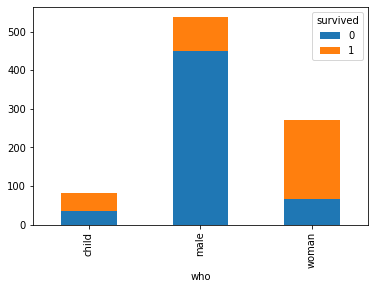

In [ ]:

""" 
Distribution of `who` and thier survival status
"""
ddd = pd.pivot_table(titanic,
               columns=['survived'], 
               index='who', 
               values='age',
               aggfunc=len)

ddd.plot.bar(stacked=True)


"""
From this plot on given dataset, it evident that majority of survivors are Female even if most of boarded passengers are Male

"""

## Part 2: Data Visualization 

Before you start: Read the book chapter “Data Visualization”.


**Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.**

### Problem 3

Dataset: Forest fires

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The file forestfires.csv includes data from Cortez and Morais (2007).

Number of instances and attributes are 517 and 13 respectively.  

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the `year`: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [ ]:
"""
Importing libraries and loading the dataset 'forestfires.csv'
"""

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("forestfires.csv") 
df.head()

Saving forestfires.csv to forestfires (2).csv


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**TODO1:** Plot a stacked bar chart to show the number of forest fires grouped by months and days of the week. *(Make sure the month are in Months chronological order i.e attribute values are sorted starting with January and ending with December)* 

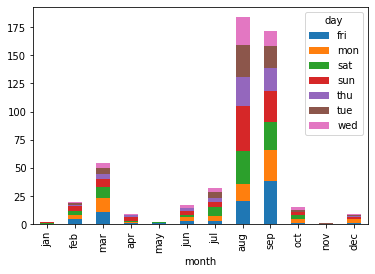

In [ ]:
ddd = pd.pivot_table(df,
               columns=['day'], 
               index='month', 
               values='X',
               aggfunc=len)

month_order = ['jan', 'feb', 'mar', 'apr',
               'may', 'jun', 'jul', 'aug',
               'sep', 'oct', 'nov', 'dec']
ddd = ddd.reindex(month_order, axis=0)

ddd.plot.bar(stacked=True)

**Hint:** Before creating the bar chart, use aforementioned data aggregation tools to transform the original dataset to the data frame you need for this section. To be more specific, you need to compute the count of forest fires by months and days before plotting.

Then [build a stacked bar chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

**TODO2 (not graded):** Do you notice any problem with the stacked bar chart? How do you plan to remedy this problem?

In [ ]:
"""
From above bar chart we can get distribution on months: Like months `Aug`& `Sep` have most of forestfires and months `Jan`, `May` & `Nov` has less forestfires. 

But we cannot depict anything with respect to weeks as Colours are clustered in each bar stack.

One solution could be having multiple panel for each weekday. But Forest fire is not a single day thing, so it doesn't make sense to view distribution per weekday.

"""

"\nFrom above bar chart we can get distribution on months: Like months `Aug`& `Sep` have most of forestfires and months `Jan`, `May` & `Nov` has less forestfires. \n\nBut we cannot depict anything with respect to weeks as Colours are clustered in each bar stack.\n\nOne solution could be having multiple panel for each weekday. But Forest fire is not a single day thing, so it doesn't make sense to view distribution per weekday.\n\n"

**TODO3:** Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and the size of the point indicating the area burnt. 

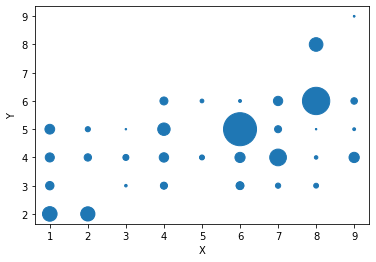

In [ ]:
"""
Pandas Scatter plot with coordinates and size of bubble showing area burnt at coordinates
  Note that, we did not perform any aggregation here, some of observations might have overlapped.
"""
df.plot.scatter(x='X', y='Y', s='area')

**Hint:** [Build a scatter plot with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

**TODO4:** Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the result in terms of correlation among the variables?

'\nFrom this pairplot, we interpret:\n  1. DC and DMC are highly corelated positively\n  2. DMC and temp are highly corelated positively\n  3. temp and RH are highly corelated negatively`\n  4. All other variables are not hhigly corelated to each other\n\n  5. temp variable is distributed normally \n\n'

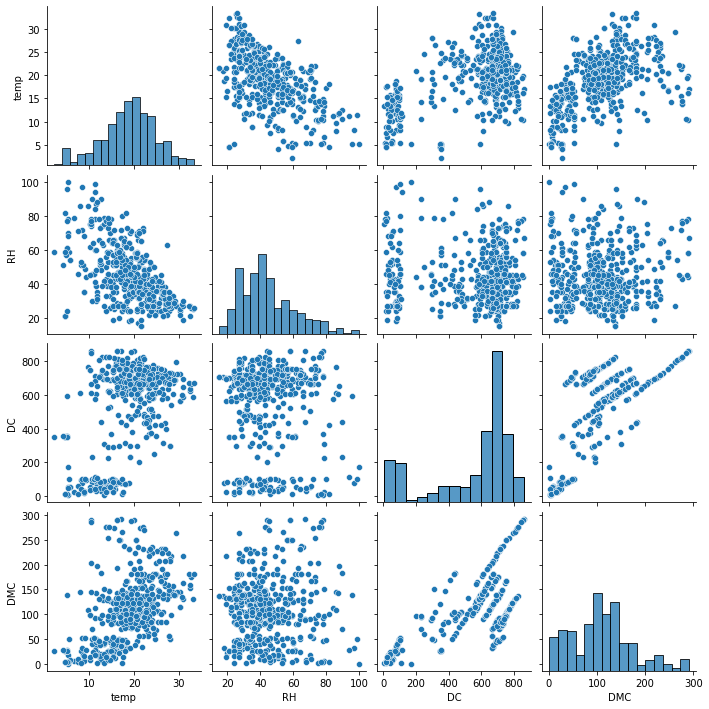

In [ ]:
matrix_df = df[['temp', 'RH', 'DC', 'DMC']]

sns.pairplot(matrix_df)

"""
From this pairplot, we interpret:
  1. DC and DMC are highly corelated positively
  2. DMC and temp are highly corelated positively
  3. temp and RH are highly corelated negatively`
  4. All other variables are not hhigly corelated to each other

  5. temp variable is distributed normally 

"""

**Hint:** [Creat a scatter matrix with Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**TODO5:** Does the wind speed affect the spread of wildfire? Use visualization to back up your answer.

'\nPlotted pairplot for wind and other measures of wildfire\n\nWe did not find any strong corelation to state.\n\nSo we tried to plot `wind` vs `area` burnt in next plot\n'

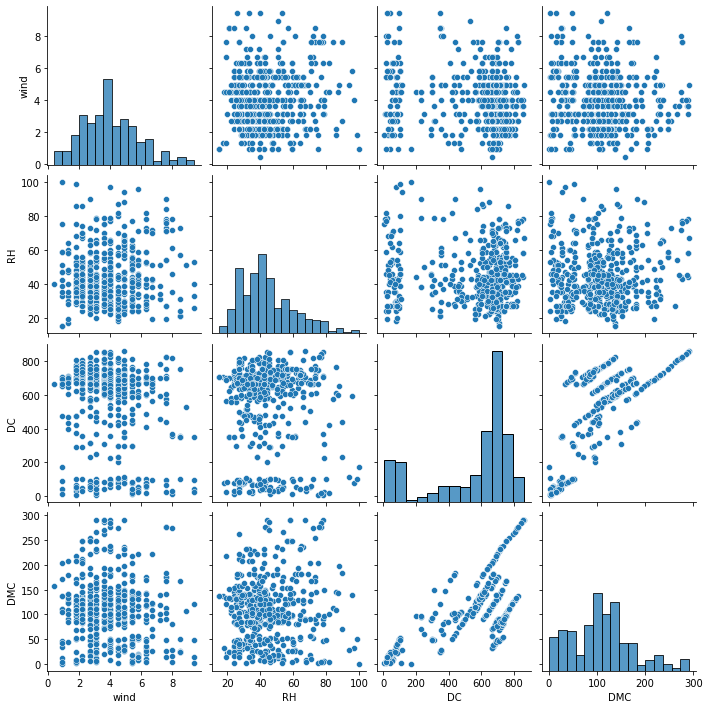

In [ ]:
matrix_df = df[['wind', 'RH', 'DC', 'DMC']]

sns.pairplot(matrix_df)

"""
Plotted pairplot for wind and other measures of wildfire

We did not find any strong corelation to state.

So we tried to plot `wind` vs `area` burnt in next plot
"""

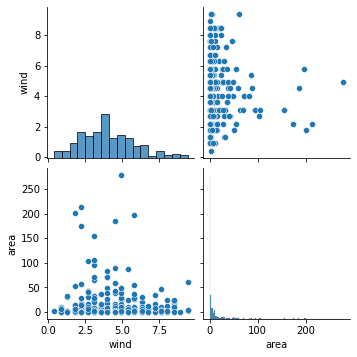

In [ ]:

"""
Here is plot between wind and area burnt:

Wind speed affect spread of wild fire only to some extent. After certain limit, high wind speed helps reduce effect of wild fire.
"""
matrix_df = df[['wind', 'area']]
matrix_df = matrix_df[matrix_df['area']<=400]
sns.pairplot(matrix_df)

### Problem 4


Dataset: Graduate School Admission 

This dataset was created for Graduate Admissions prediction.

The purpose is to help students with shortlisting target universities according to their profiles. 

The predicted output gives them a fair idea about their chances of admission for a particular university.

Attribute Information: 

Serial.No.: application number: 1 to 500 

GRE.Score: GRE score: 290 to 340 

TOEFL.Score: TOEFL score: 92 to 120 

University.Rating: undergraduate school’s rating: A to E 

SOP: Statement of Purpose score: 1 to 5 

LOR: Letter of Recommendation score: 1 to 5 

CGPA: Undergraduate GPA: 6.8 to 9.92 

Research: Research experience: Yes or No 

Chance.of.Admit: Chance of getting admitted: 0.34 to 0.97

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Admission_Predict.csv") 
df.head()

Saving Admission_Predict.csv to Admission_Predict.csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


**TODO1:** Is LOR score related to CGPA? Use visualization to back up your answer.

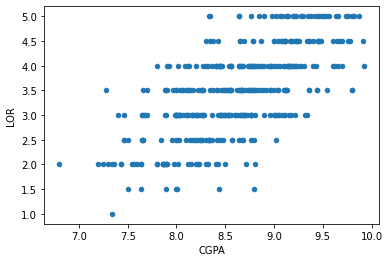

In [ ]:
df.plot.scatter(x = 'CGPA', y = 'LOR ')

'\nYes, LOR is strongly related to CGPA\nFrom this visualization, we can see strong positive relation between LOR and CGPA\n\n'

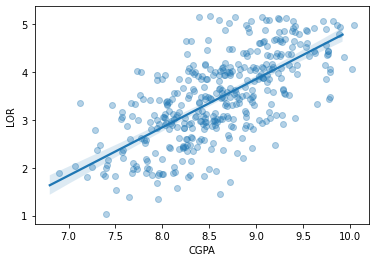

In [ ]:
import seaborn as sb
sb.regplot(data = df, x = 'CGPA', y = 'LOR ', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

"""
Yes, LOR is strongly related to CGPA
From this visualization, we can see strong positive relation between LOR and CGPA

"""


**Hint:** Use the visualization that is used to compare 2 numerical variables

**TODO2:** 
*   Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot. 

*   Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.


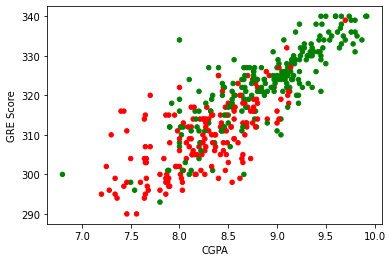

In [ ]:

"""
Encoding Research values `yes` = `Green` and `no` = `Red`
"""
df['Research_color'] = df['Research'].replace('yes', 'green').replace('no', 'red')

""" 
Scatter plot between CGPA and GRE using Research for clour of dot
From this plot it is evident that, Most of students with Research experience have good GRE and CGPA scores
"""

df.plot.scatter(x='CGPA', y='GRE Score', c='Research_color')


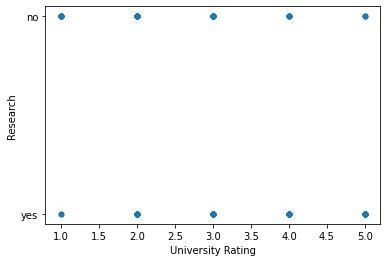

In [ ]:

"""
Scatter plot between University rating and Research

This plot now usefull because both variable are discrete and most of observations are just overlapping each other. This mostly happens when plot scatter plot on both categorical variables.


"""
df.plot.scatter(x='University Rating', y='Research')

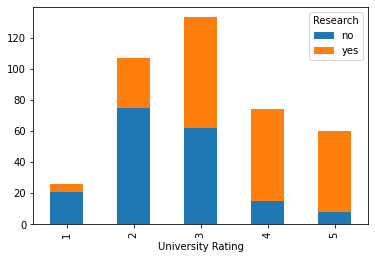

In [ ]:

"""
To understand relationship between two categorical-discrete variables we must perform aggregation like count or precentage.

Here, we plotted a stacked bar chart with count of universities. From which we can interpret
  1. Most of universities have rating 3 and followed by 2
  2. Universities with Research are most likely to get higher rating.
  3. Most of high rated uniersities are involved in Research
"""

ddd = pd.pivot_table(df,
               columns=['Research'], 
               index='University Rating', 
               values='Serial No.',
               aggfunc=len)

ddd.plot.bar(stacked=True)

**TODO3:** Plot a pie chart of University Rating. The pie chart should also present the percentage of each slice. Explain your findings. *(Make sure you show data labels)*

In [ ]:

"""
Pie chart for distribution of University ratings.

  1. First we need to calculate percentage per each rating
  2. Using those percentages plot a Pie chart
  3. autopct = '%1.1f%%' helps present percentages on each slice
  4. Just highlighted big slice from chart using explode

What we can interpret from this pie chart:
  1. 1/3rd of universities have rating 3
  2. It is good to see very less universities are rated 1 (lowest)
  3. We have 1/3rd top rated university (with rating 4 or 5)

"""

df_pie = df.groupby('University Rating').size() * 100 / df.index.size
df_pie
df_pie.plot.pie( label="University Rating", autopct='%1.1f%%', explode=(0, 0, 0.05, 0, 0))



University Rating
1     6.50
2    26.75
3    33.25
4    18.50
5    15.00
dtype: float64

**Hint:** [Build a pie chart with Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Build a pie chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

**TODO4:** What other insights can you draw from this dataset? Present one finding with visualization.

In [ ]:

"""
Here is pairplot between 'Chance of Admit ', 'CGPA', 'TOEFL Score', 'GRE Score'

Which represent all these variables are strongly corelated to each other (positive)
We can reduce some dimensions as they apprear to be redundent.

For predictive `Chance of Admit`, we can consider `CGPA` and remove 'TOEFL Score', 'GRE Score' (as part of dimension reduction), 
as these three variables are strongly corelated to each other and driving output in same direction.
And why we chose `CGPA` is with respect to this domian, CGPA holds high weightage/consideration compared to GRE or TOFEL.
"""

matrix_df = df[['Chance of Admit ', 'CGPA', 'TOEFL Score', 'GRE Score']]

sns.pairplot(matrix_df)


NameError: ignored